In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#Since id variable has all unique values, removing it
df = df.drop('id',axis=1)

In [2]:
#since location values are not reliable as they are put by people, removing it
df = df.drop('location',axis=1)

NameError: name 'df' is not defined

In [ ]:
df.shape

In [1]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.sample(10)

In [ ]:
#checking for null values
df.isnull().sum()/len(df)*100

In [ ]:
#filling null values with unknown
df['keyword'] = df['keyword'].fillna('unknown')

In [ ]:
df.isnull().sum()/len(df)*100

In [ ]:
#checking duplicate values
df.duplicated().sum()

In [ ]:
#dropping duplicates
df.drop_duplicates(keep = 'first',inplace=True)

In [ ]:
df.duplicated().sum()

In [ ]:
# Distribution of disaster and non-disaster tweets

print(df['target'].value_counts())
print((df['target'].value_counts()/df['target'].count())*100)

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), dpi=100)

df.groupby('target').count()['text'].plot(kind='pie', ax=axes[0], labels=['Not Disaster (57%)', 'Disaster (43%)'], autopct='%1.1f%%')
sns.countplot(x='target', data=df, hue='target', ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'], rotation=0)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.tight_layout()
plt.show()

In [ ]:
df['target_mean'] = df.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=df.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

df.drop(columns=['target_mean'], inplace=True)

In [ ]:
disaster_tweet_len = df[df['target'] == 1]['text'].str.len()
non_disaster_tweet_len = df[df['target'] == 0]['text'].str.len()

# Plotting both on the same histogram
plt.figure(figsize=(10, 6))
plt.hist(disaster_tweet_len, color='red', alpha=0.6, label='Disaster Tweets', bins=30)
plt.hist(non_disaster_tweet_len, color='green', alpha=0.6, label='Non-Disaster Tweets', bins=30)

# Adding titles and labels
plt.title('Tweet Length Distribution for Disaster vs Non-Disaster Tweets')
plt.xlabel('Tweet Length (Characters)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Text Preprocessing

In [4]:
print(f"Example of disaster tweet: {df.text[df.target == 1].iloc[2]}")
print(f"Example of non-disaster tweet: {df.text[df.target == 0].iloc[41]}")

Example of disaster tweet: All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
Example of non-disaster tweet: #stlouis #caraccidentlawyer Speeding Among Top Causes of Teen Accidents https://t.co/k4zoMOF319 https://t.co/S2kXVM0cBA Car Accident teeÛ_


In [5]:
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import re
from nltk import word_tokenize
def clean_words(text):
    text = re.sub(r'(http.*)|#', '', text)
    tokens = word_tokenize(text)
    stops = stopwords.words('english')
    clean_tokens = [token.lower() for token in tokens if token.lower() not in stops and token.isalnum()]
    return ' '.join(clean_tokens)

In [7]:
df['text'] = df['text'].apply(clean_words)

In [8]:
#df['keyword'] = df['keyword'].apply(clean_words)
#dropping keyword 
df.drop('keyword',inplace=True,axis=1)

In [9]:
#lemmatizing using spacy
import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):

    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])

    return lemmatized_text

In [10]:
df['text'] = df['text'].apply(lemmatize_text)

In [11]:
df.sample(20)

,id,location,text,target
3608,5150,Play For Ryan ??,fatal attraction,0
1824,2622,Weston super mare,olliebailey11 havnt crash,0
1519,2193,Planet Earth,learn legacy catastrophic eruption new yorker,1
7490,10712,"Orlando, FL",gop debate drinking game anyone look bit fun w...,0
3744,5321,Wrex,,0
832,1209,"Houston, TX",lonewolffur need,0
1687,2435,"Maryland,Baltimore",even star moon collide oh oh never want back l...,0
1630,2354,LiVE MÌS,thehighfession friend come school blasted ask ...,0
6824,9774,Utah,hollywood movie trap miner release chile,0
6653,9533,????? ???? ????,udhampuragain 2 terrorist shot dead udhampur,1


In [12]:
from nltk.probability import FreqDist
def make_freq(data):
    all_tweets = " ".join(data)

    tokens = word_tokenize(all_tweets)
    frequency = FreqDist(tokens)

    return frequency

make_freq(df["text"])

FreqDist({'get': 415, 'like': 390, 'fire': 350, 'amp': 325, 'go': 300, 'new': 217, 'one': 202, 'say': 199, 'people': 197, 'see': 181, ...})

In [13]:
disasters = df["text"][df.target == 1]
no_disasters = df["text"][df.target == 0]

make_freq(disasters)

FreqDist({'fire': 262, 'kill': 143, 'amp': 130, 'disaster': 118, 'news': 117, 'get': 113, 'bomb': 111, 'california': 110, 'police': 107, 'people': 105, ...})

In [14]:
make_freq(no_disasters)


FreqDist({'get': 302, 'like': 293, 'go': 213, 'amp': 195, 'new': 163, 'one': 134, 'make': 128, 'see': 126, 'body': 111, 'love': 108, ...})

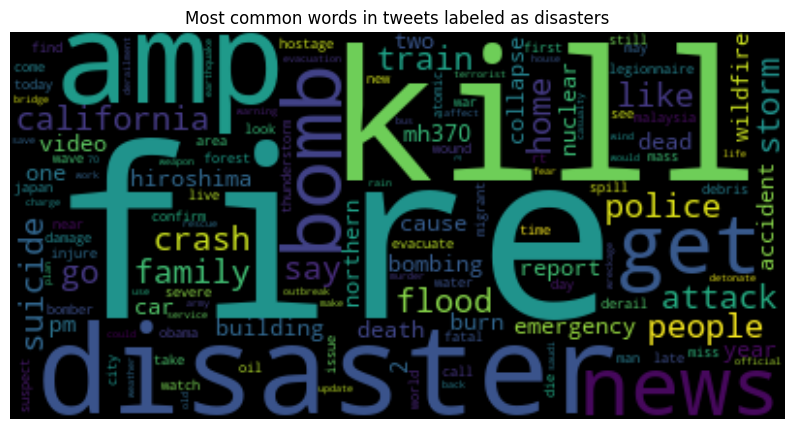

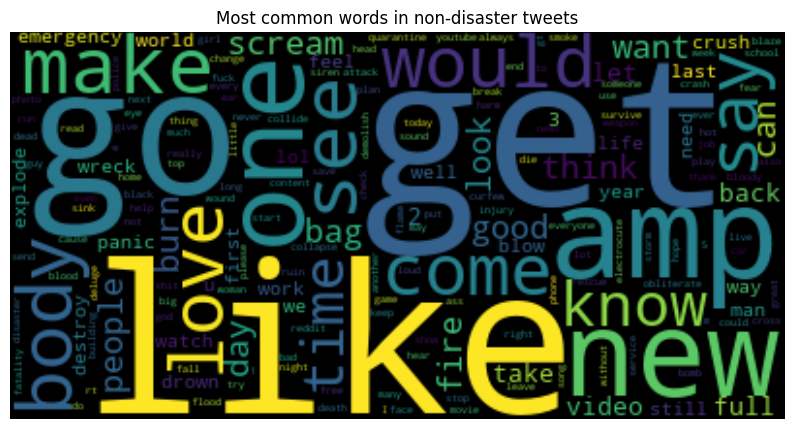

In [17]:
from wordcloud import WordCloud

def make_cloud(data, title = None):
    wordcloud = WordCloud().generate_from_frequencies(make_freq(data))

    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

make_cloud(disasters, "Most common words in tweets labeled as disasters")
make_cloud(no_disasters, "Most common words in non-disaster tweets")